In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
money = pd.read_csv('money_sports_clean.csv', index_col=0)
sports = pd.read_csv('abilities_sports_clean.csv',index_col=0)

In [3]:
money.head()

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings_million
0,1,Mike Tyson,USA,1,Boxing,1990,28.6
1,2,Buster Douglas,USA,2,Boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,Boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,Auto Racing,1990,10.0
4,5,Alain Prost,France,5,Auto Racing,1990,9.0


In [4]:
sports.head()

,Sport,Endurance,Strength,Power,Speed,Agility,Flexibility,Nerve,Durability,Hand-Eye Coordination,Analytical Aptitude,Total,Rank
0,Boxing,8.63,8.13,8.63,6.38,6.25,4.38,8.88,8.50,7.00,5.63,72.375,1
1,Ice Hockey,7.25,7.13,7.88,7.75,7.63,4.88,6.00,8.25,7.50,7.50,71.750,2
2,Football,5.38,8.63,8.13,7.13,6.38,4.38,7.25,8.50,5.50,7.13,68.375,3
3,Basketball,7.38,6.25,6.50,7.25,8.13,5.63,4.13,7.75,7.50,7.38,67.875,4
4,Wrestling,6.63,8.38,7.13,5.13,6.38,7.50,5.00,6.75,4.25,6.38,63.500,5


First let's take an overall view of the total (the sum of all aptitudes) for all sports

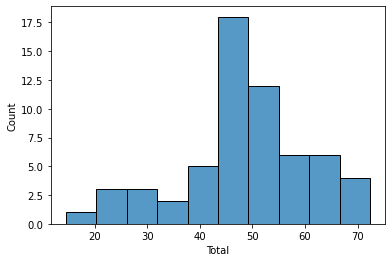

In [5]:
sns.histplot(data=sports, x=sports.Total);

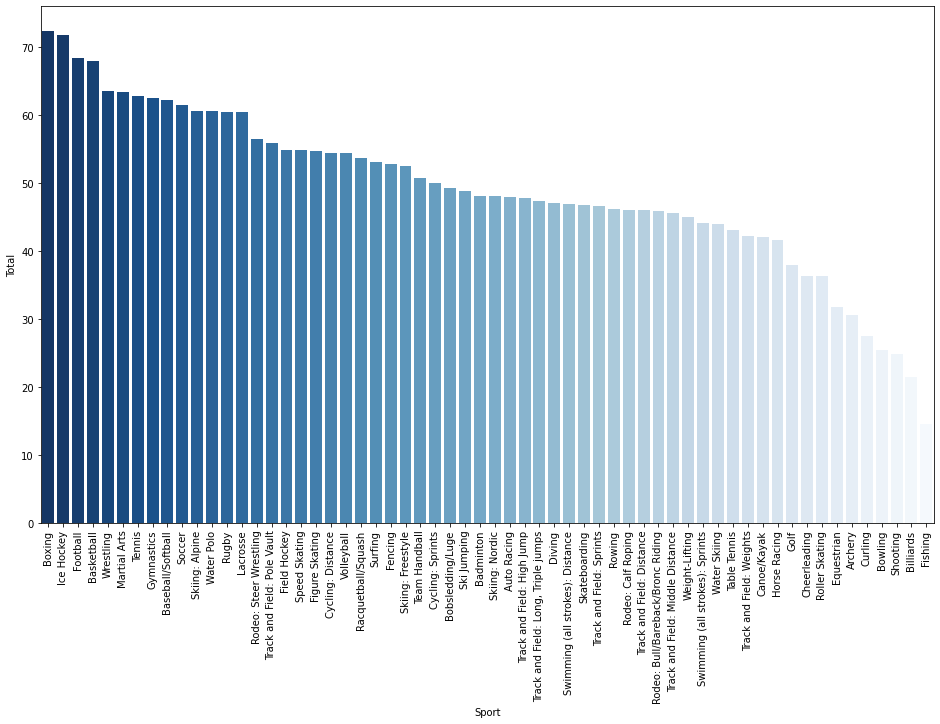

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 9.5)
sns.barplot(data=sports, x=sports.Sport, y=sports.Total, palette='Blues_r')
plt.xticks(rotation=90)
plt.show()

In [7]:
# do we really care about all this sports? 
# yes due to the model we are going to develop later on, but for the classification not really, why?
# becasue we will match the sports in the two dataframes, so we might as well make a copy of this dataframe with only the 
# sports relevant, the ones that appear on the other dataframe as well.

In [8]:
# so which are the sports present on the ohter dataframe?

In [9]:
money.Sport.unique()

array(['Boxing', 'Auto Racing', 'Golf', 'Basketball', 'Tennis',
       'American Football', 'Baseball', 'Hockey', 'Nascar', 'Soccer',
       'Cycling', 'Moto GP', 'MMA'], dtype=object)

In [10]:
sports.Sport.unique()

array(['Boxing', 'Ice Hockey', 'Football', 'Basketball', 'Wrestling',
       'Martial Arts', 'Tennis', 'Gymnastics', 'Baseball/Softball',
       'Soccer', 'Skiing: Alpine', 'Water Polo', 'Rugby', 'Lacrosse',
       'Rodeo: Steer Wrestling', 'Track and Field: Pole Vault',
       'Field Hockey', 'Speed Skating', 'Figure Skating',
       'Cycling: Distance', 'Volleyball', 'Racquetball/Squash', 'Surfing',
       'Fencing', 'Skiing: Freestyle', 'Team Handball',
       'Cycling: Sprints', 'Bobsledding/Luge', 'Ski Jumping', 'Badminton',
       'Skiing: Nordic', 'Auto Racing', 'Track and Field: High Jump',
       'Track and Field: Long, Triple jumps', 'Diving',
       'Swimming (all strokes): Distance', 'Skateboarding',
       'Track and Field: Sprints', 'Rowing', 'Rodeo: Calf Roping',
       'Track and Field: Distance', 'Rodeo: Bull/Bareback/Bronc Riding',
       'Track and Field: Middle Distance', 'Weight-Lifting',
       'Swimming (all strokes): Sprints', 'Water Skiing', 'Table Tennis',
   

We can do serveral groupbys within the money dataframe to see a lot of individual things such as:
- How a certain sport has evolved in the last 30 years
- How much money has a singular sport made each year
- Which has been the most prevalent sports in the last 30 years in general and on each year
- The money made by each sport in the last 30 years


In [23]:
money.head()

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings_million
0,1,Mike Tyson,USA,1,Boxing,1990,28.6
1,2,Buster Douglas,USA,2,Boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,Boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,Auto Racing,1990,10.0
4,5,Alain Prost,France,5,Auto Racing,1990,9.0


In [27]:
agrupado = money.groupby(['Sport'],as_index=False).agg({'earnings_million' : 'mean'})

In [28]:
agrupado.head()

,Sport,earnings_million
0,American Football,46.935000
1,Auto Racing,33.267742
2,Baseball,24.085714
3,Basketball,41.869512
4,Boxing,49.973913


In [30]:
agrupado.shape

(13, 2)

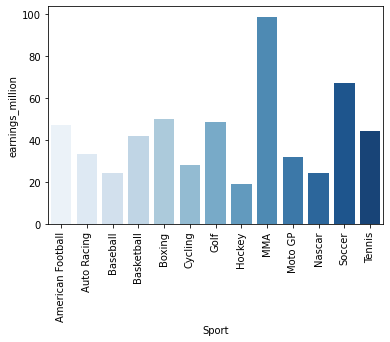

In [36]:
sns.barplot(data=agrupado, x=agrupado.Sport, y=agrupado.earnings_million, palette='Blues')
plt.xticks(rotation=90)
plt.show()

In [40]:
# why is MMA ths sport with more aernings (in million USD) in the last 30 years?
# ToDo - Anwer this

In [38]:
# I want to visualize the change of each sport within our 30 years change based on the earnings

In [39]:
# we can take the groupby we made before (sports with mean earnings) and later on we can add the years

In [42]:
# can I do a grpupby with two columns?, I mean, I want the year (unique) in one column, but then I want each sport tobe a 
# single column and the values in this columns, conecting with the years, are the avg. earnings per sport per year